In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy import stats as st
from kuramoto import Kuramoto, plot_activity, plot_phase_coherence

### parametros del modelo

coupl = 3 # Coupling
dt = 0.1 #
T=10 # time interval (0, T)
num_osc = 100 # number of oscillators

Distribution of frequencies

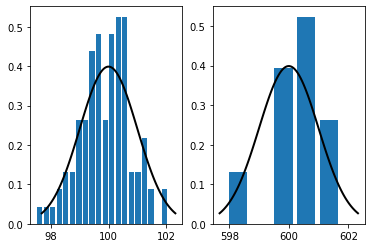

In [2]:
## initialize distributions

normal_dist = st.norm(loc=100, scale=1) ## normal distribution centered at 100 and standar deviation 1
natfreqs_sample = normal_dist.rvs(size=num_osc) ## sample of size = num_osc

normal_dist_2 = st.norm(loc=500, scale=1) ## normal distribution centered at 100 and standar deviation 1
natfreqs_sample = np.append(natfreqs_sample,normal_dist_2.rvs(size=10)) ## sample of size = num_osc

## initialize figures
fig, ax = plt.subplots(1, 2)

x = np.linspace(normal_dist.ppf(0.01), normal_dist.ppf(0.99), 100)
x2 = np.linspace(normal_dist_2.ppf(0.01), normal_dist_2.ppf(0.99), 100)

ax[0].plot(x, normal_dist.pdf(x), 'k-', lw=2, label='frozen pdf'); # pdf
ax[0].hist(natfreqs_sample[:-10], bins=20, rwidth=0.8, density=True); # histogram of the sample

ax[1].plot(x2, normal_dist_2.pdf(x2), 'k-', lw=2, label='frozen pdf'); # pdf
ax[1].hist(natfreqs_sample[-10:], bins=5, rwidth=0.8, density=True); # histogram of the sample

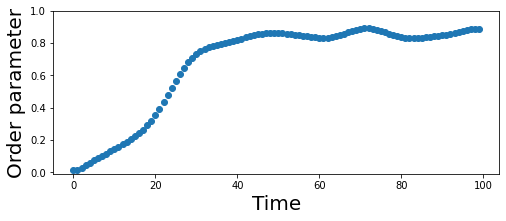

In [3]:
labeldict = {i:e for i, e in enumerate(np.floor(natfreqs_sample))}

graph_nx = nx.erdos_renyi_graph(n=len(natfreqs_sample), p=1) # p=1 -> all-to-all connectivity
graph = nx.to_numpy_array(graph_nx)
#nx.draw(graph_nx, labels=labeldict, with_labels = True)

model = Kuramoto(coupling=coupl, dt=dt, T=T, natfreqs=natfreqs_sample)   
act_mat = model.run(adj_mat=graph)

plot_phase_coherence(act_mat);

In [4]:
np.append([1,2,4], [10,20,30])

array([ 1,  2,  4, 10, 20, 30])